# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Data set

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
X = df.iloc[:,[3,4]].values
print(pd.DataFrame(X))

       0   1
0     15  39
1     15  81
2     16   6
3     16  77
4     17  40
..   ...  ..
195  120  79
196  126  28
197  126  74
198  137  18
199  137  83

[200 rows x 2 columns]


# Using Elbow Method to find the optimal number of clusters
#### Here we are just using KMeans class to visualize and analyse to find the optimal number of Clusters... 

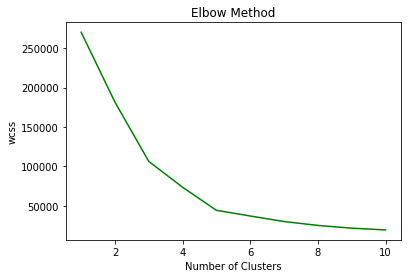

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i,init='k-means++',random_state = 42)
    kmean.fit(X)
    wcss.append(kmean.inertia_)
plt.plot(range(1,11),wcss,color = 'green')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()


##### So according to the graph 5 k-points(clusters) gives us the best results....in the next step we will train the model with n_clusters = 5

# Training Data Set Using KMeans Cluster Algorithm

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,init= 'k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(X)


In [6]:
print(y_kmeans)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


# Visualization

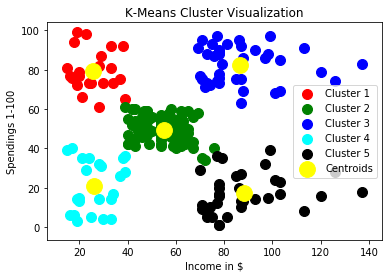

In [7]:
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],s = 100,c='red',label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],s = 100,c='green',label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],s = 100,c='blue',label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1],s = 100,c='cyan',label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1],s = 100,c='black',label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=250,c='yellow',label = 'Centroids')
plt.title('K-Means Cluster Visualization')
plt.xlabel('Income in $')
plt.ylabel('Spendings 1-100')
plt.legend()
plt.show()